In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Reading the data
data =pd.read_csv('Avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
# Check the first five 
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Check the last five columns
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


# EDA (Exploratory Data Analysis)

In [6]:
# Rename the column names
data = data.rename(columns={'Date':'date','AveragePrice':'average_price','Total Volume':'total_volume','4046':'PL_4046','4225':'PL_4225','4770':'PL_4770','Total Bags':'total_bags','Small Bags':'small_bags','Large Bags':'large_bags','XLarge Bags':'xlarge_bags'})

In [7]:
data

,Unnamed: 0,date,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [8]:
# Drop the Unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data

,date,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [10]:
# check the dimesion
data.shape

(1517, 13)

In [11]:
data['date']=pd.to_datetime(data['date'])
data['month']=data['date'].apply(lambda x:x.month)
data['day']=data['date'].apply(lambda x:x.day)

In [12]:
data

,date,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [13]:
# check the dimesion
data.shape

(1517, 15)

In [14]:
data.head()

,date,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
# Check the null values
data.isnull().sum()

date             0
average_price    0
total_volume     0
PL_4046          0
PL_4225          0
PL_4770          0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
region           0
month            0
day              0
dtype: int64

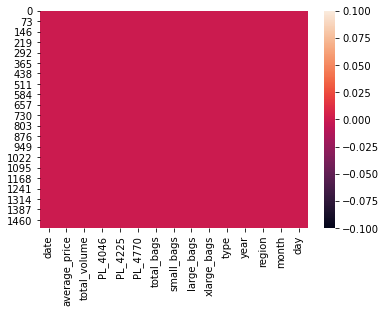

In [16]:
# check the null values through heatmap 
sns.heatmap(data.isnull())

'''From above I can say that there is no missing values in dataset because the red color is distributed equally correspond to each colum 
'''

In [17]:
# Find the hoe much avocado is selled in last 4 years
data.groupby('year')['type'].value_counts()

year  type        
2015  conventional    1270
2016  conventional     247
Name: type, dtype: int64

In [18]:
# Check the summary statistics
data.describe()

,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,year,month,day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

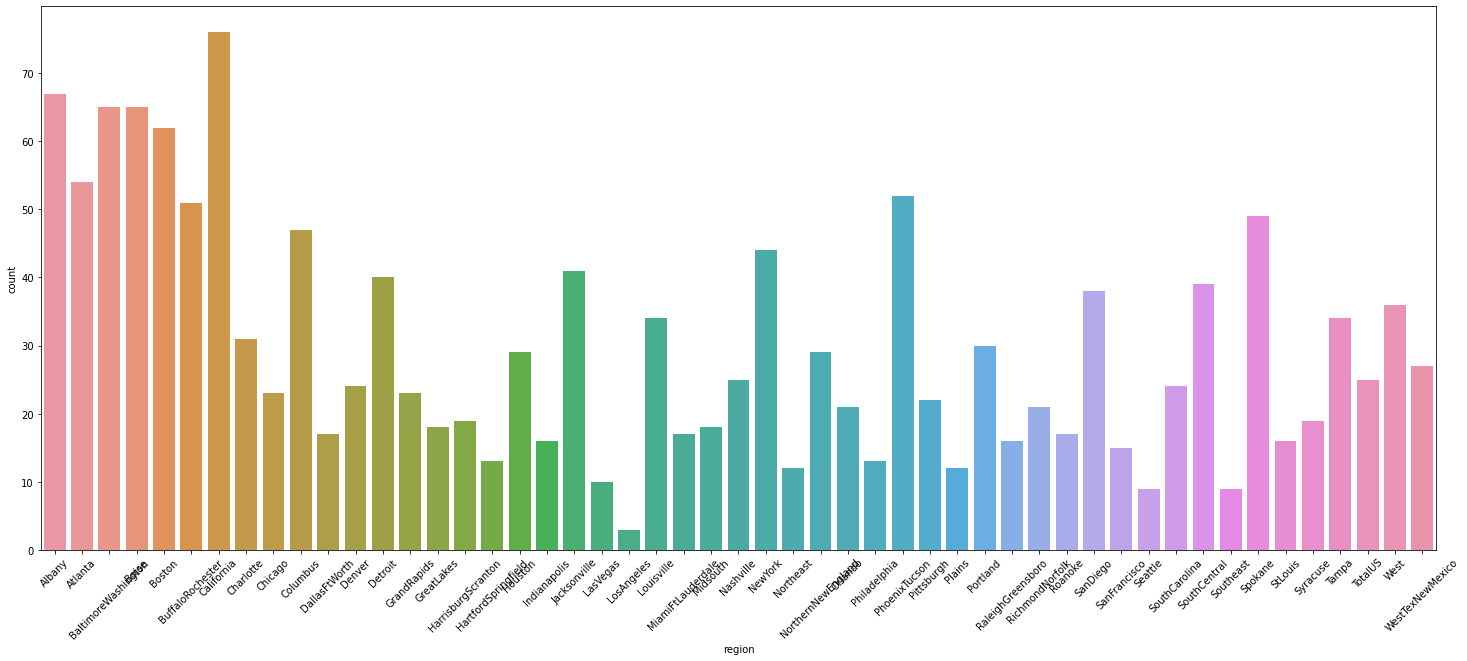

In [19]:
# Bar Chart - It will indicate the number of regions 
plt.figure(figsize=[25,10])
sns.countplot(x = 'region', data = data)
plt.xticks(rotation = 45)

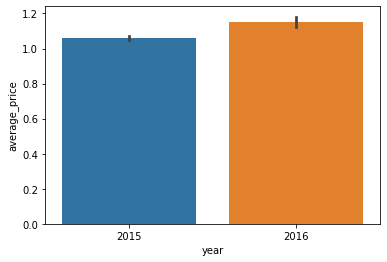

In [20]:
# check the ratio of year and price that which year had max average price
sns.barplot(x='year',y='average_price',data=data)

''' 
From above we can say that the max price was observed in 2016.
'''

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

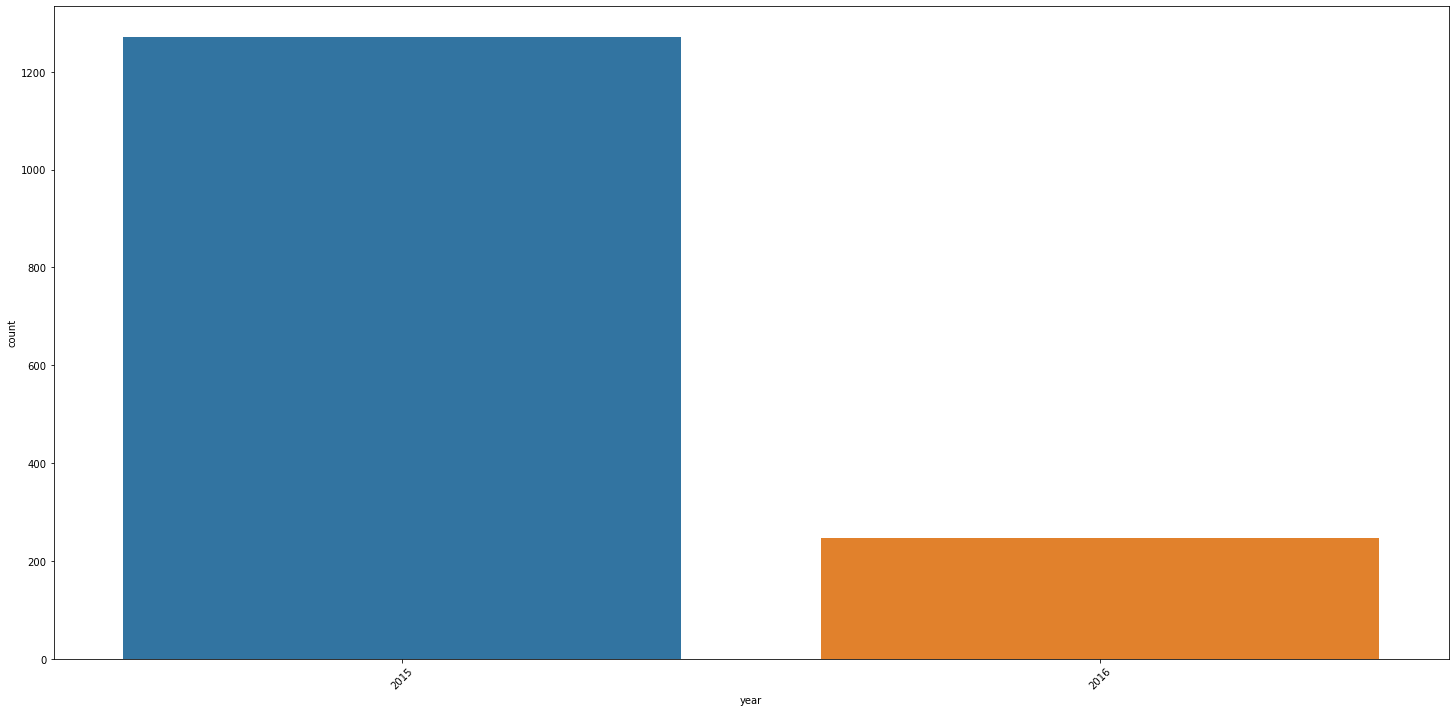

In [21]:
# Check the count with respect to year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = data)
plt.xticks(rotation = 45)

### Univariate Analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CE56166D0>,
      dtype=object)

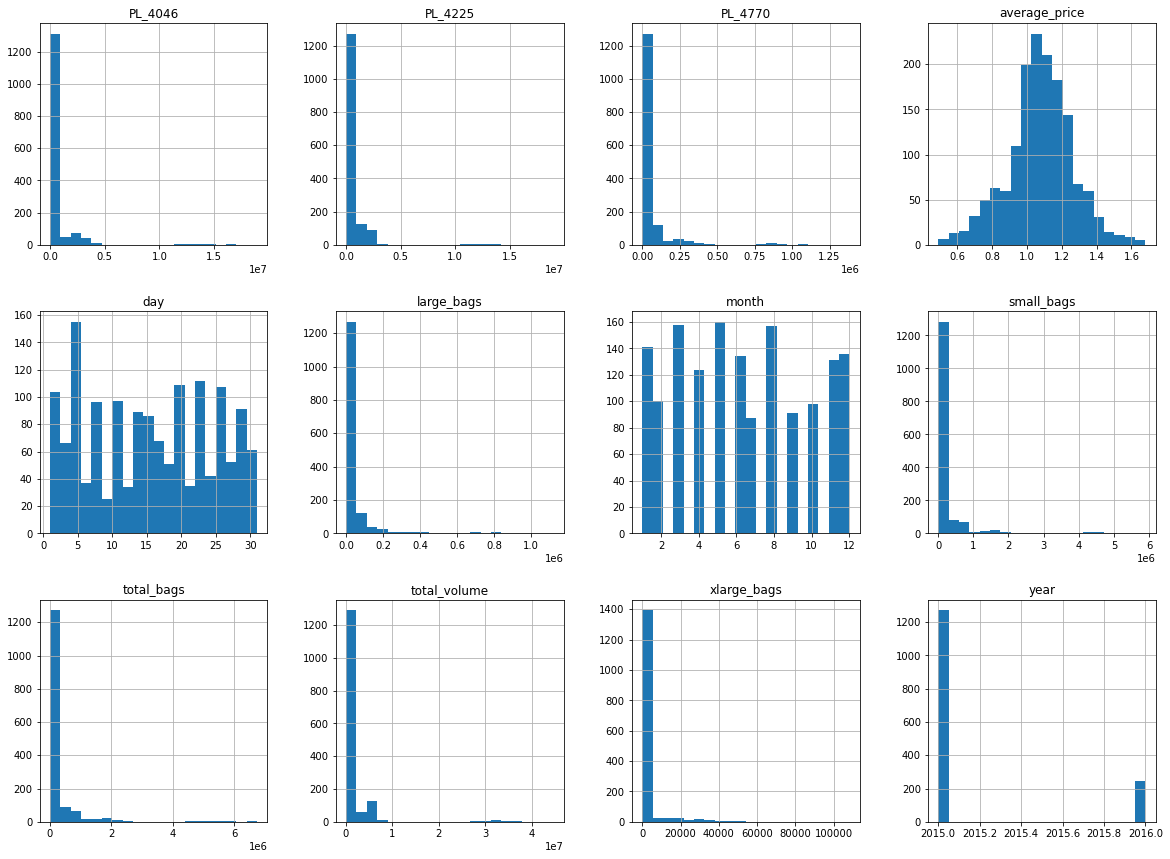

In [22]:
data.hist(figsize=(20,20),grid=True,layout=(4,4),bins=20)

In [23]:
# Check the skewness
data.skew()

average_price   -0.109444
total_volume     6.200138
PL_4046          6.051830
PL_4225          6.394926
PL_4770          5.405164
total_bags       5.366378
small_bags       5.355185
large_bags       5.144495
xlarge_bags      5.775077
year             1.828332
month            0.101439
day              0.041303
dtype: float64

In [24]:
# Treating skewness
skew = ('total_volume','PL_4046','PL_4225','PL_4770','total_bags','small_bags','large_bags','xlarge_bags')
for col in skew:
    if data.skew().loc[col]>0.55:
        data[col] = np.log1p(data[col])

In [25]:
# Check skewness after treating
data.skew()

average_price   -0.109444
total_volume     0.667468
PL_4046         -0.160268
PL_4225          0.184436
PL_4770         -0.355508
total_bags       0.695502
small_bags       0.713843
large_bags      -0.912766
xlarge_bags      0.783913
year             1.828332
month            0.101439
day              0.041303
dtype: float64

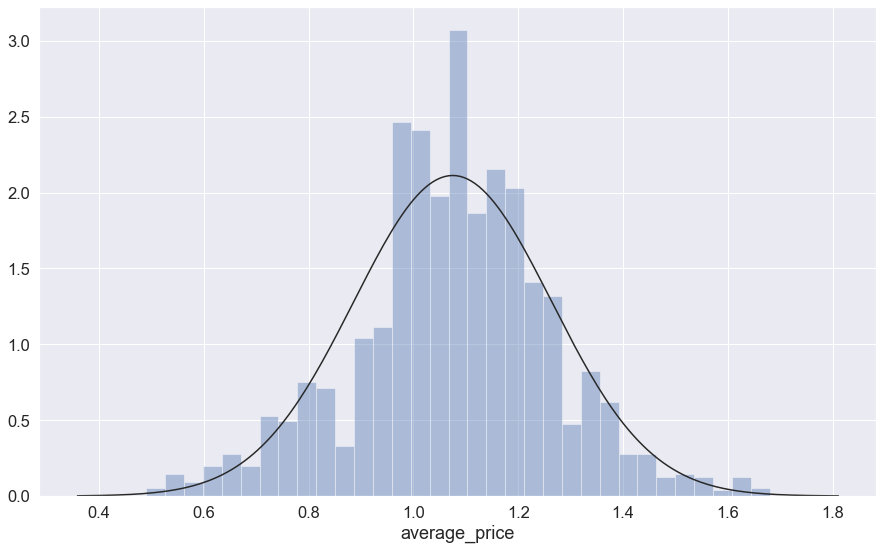

In [26]:
# range Average price lies, what is distribution look like?
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.average_price, kde=False, fit=norm)

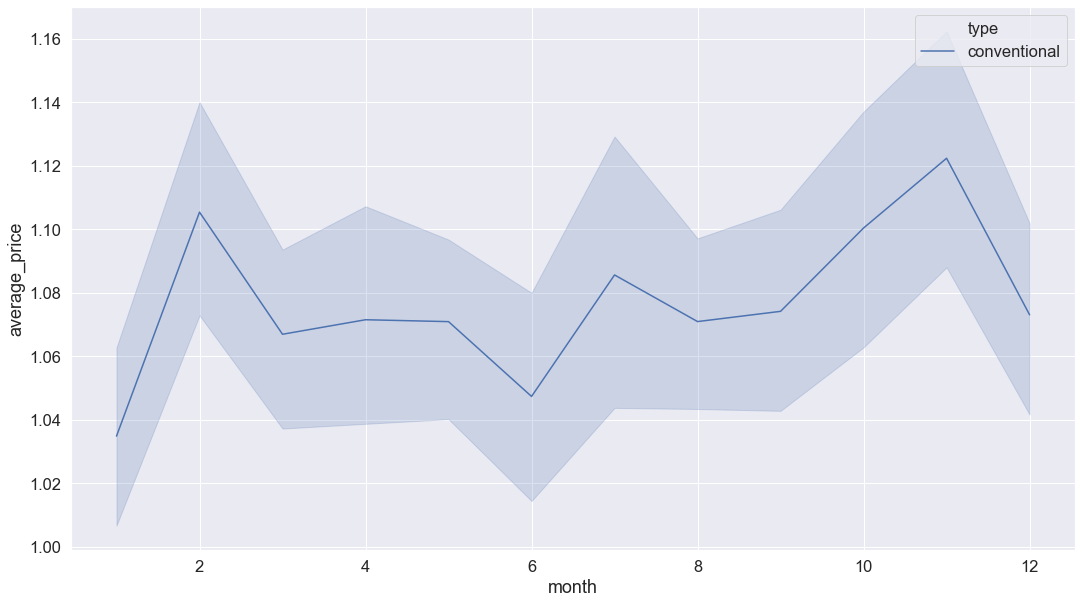

In [27]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="average_price", hue='type', data=data)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

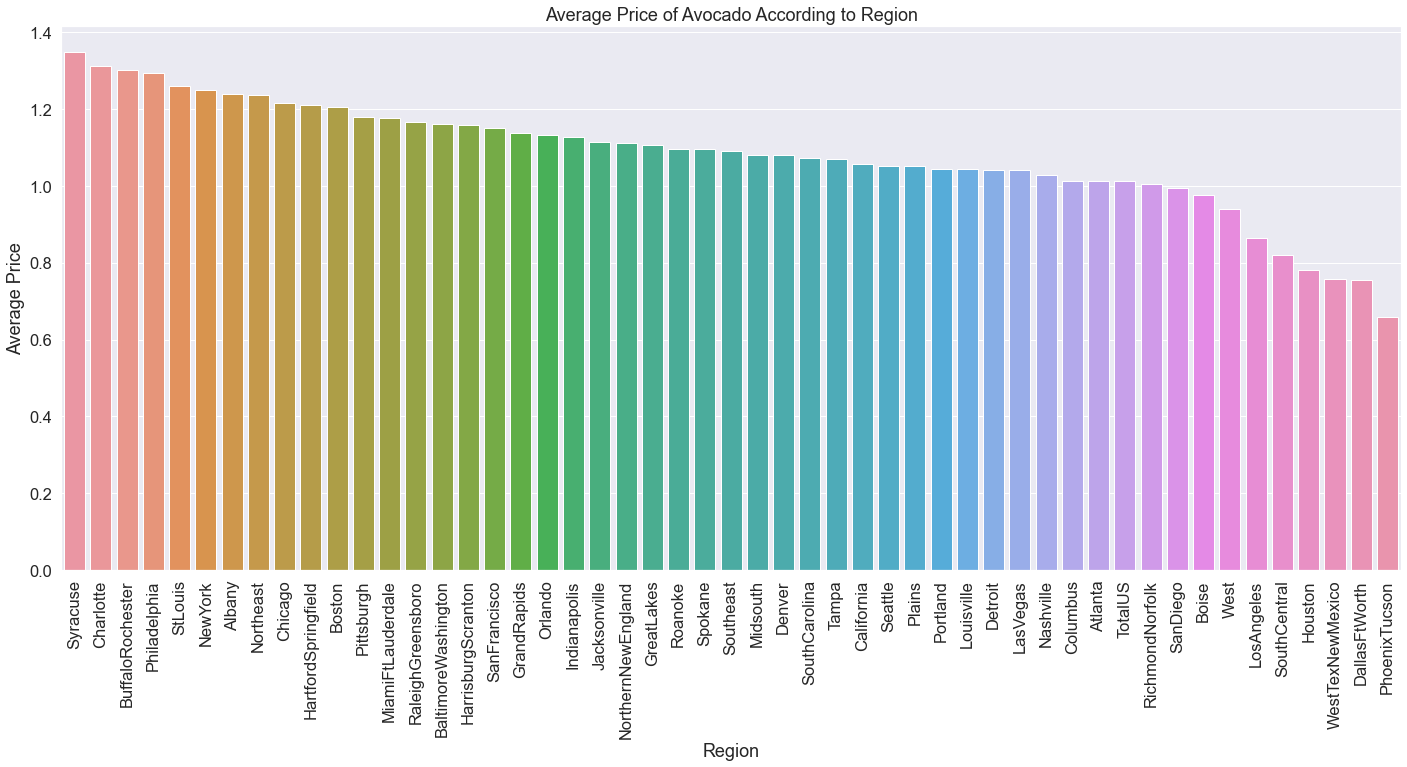

In [28]:
# TOP 5 regions where Average price are very high?

region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.average_price)/len(x)
    average_price.append(region_average)

data1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=data1.average_price.sort_values(ascending=False).index.values
sorted_data=data1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

#### Looks like these region are where price is very high
Syracuse

Charlotte

BuffaloRochester

Philadelphia

StLouis

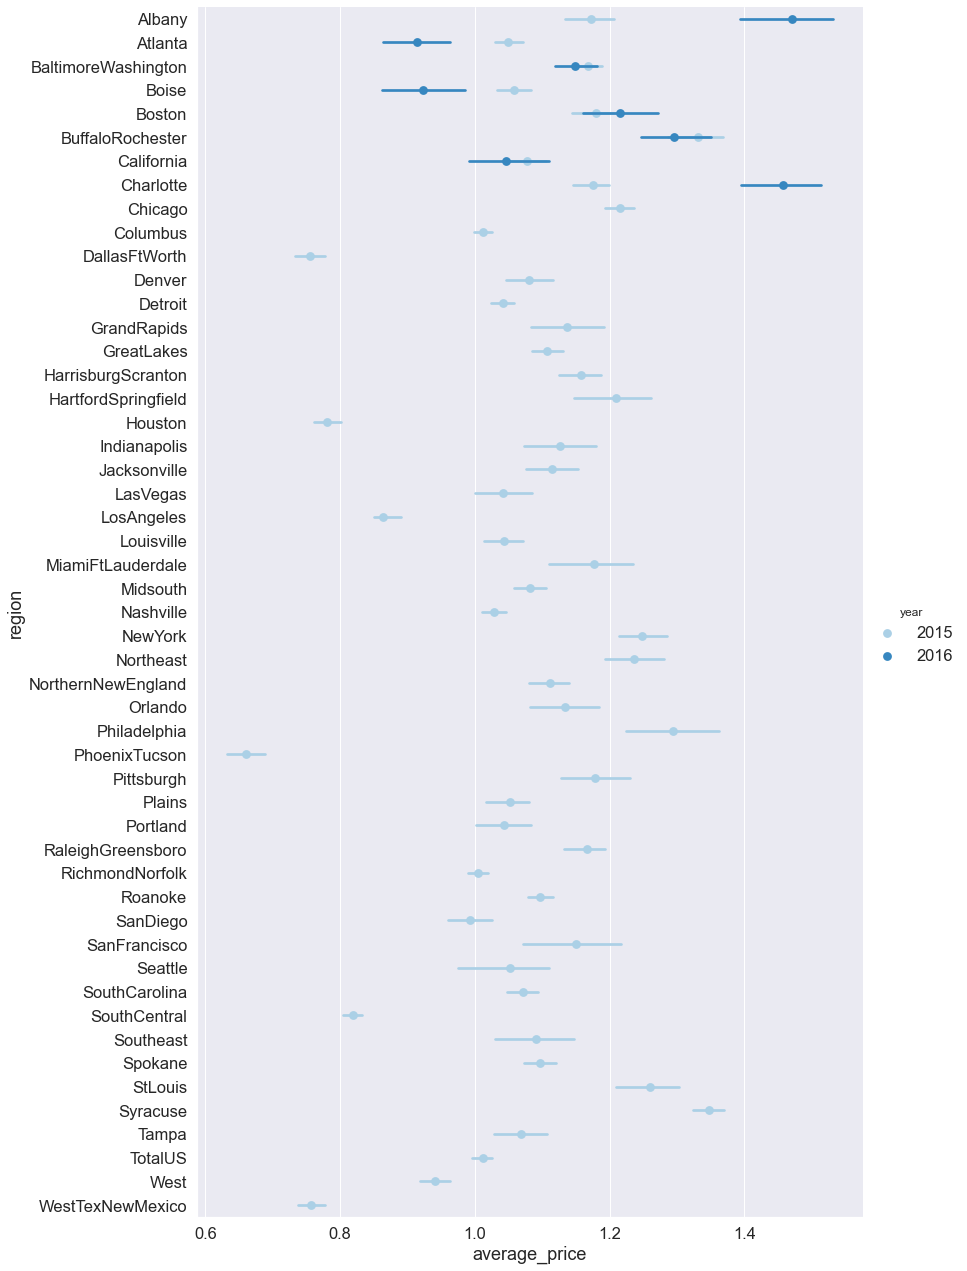

In [29]:
# In which year and for which region was the Average price the highest?

g = sns.factorplot('average_price','region',data=data,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

# Feature Engineering

In [30]:
data['region'].nunique()

51

In [31]:
data['type'].nunique()

1

As we can see that we have 51 regions and 1 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [32]:
data_final=pd.get_dummies(data.drop(['region','date'],axis=1),drop_first=True)

In [33]:
data_final.head()

,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,year,month,day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,11,29


In [34]:
data_final.tail()

,average_price,total_volume,PL_4046,PL_4225,PL_4770,total_bags,small_bags,large_bags,xlarge_bags,year,month,day
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,2016,10,16
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,2016,9,10
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,2016,2,10
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,2016,9,25
1516,1.43,12.117128,10.671682,10.900333,9.715042,11.143390,10.958796,9.363006,0.000000,2016,9,18


[]

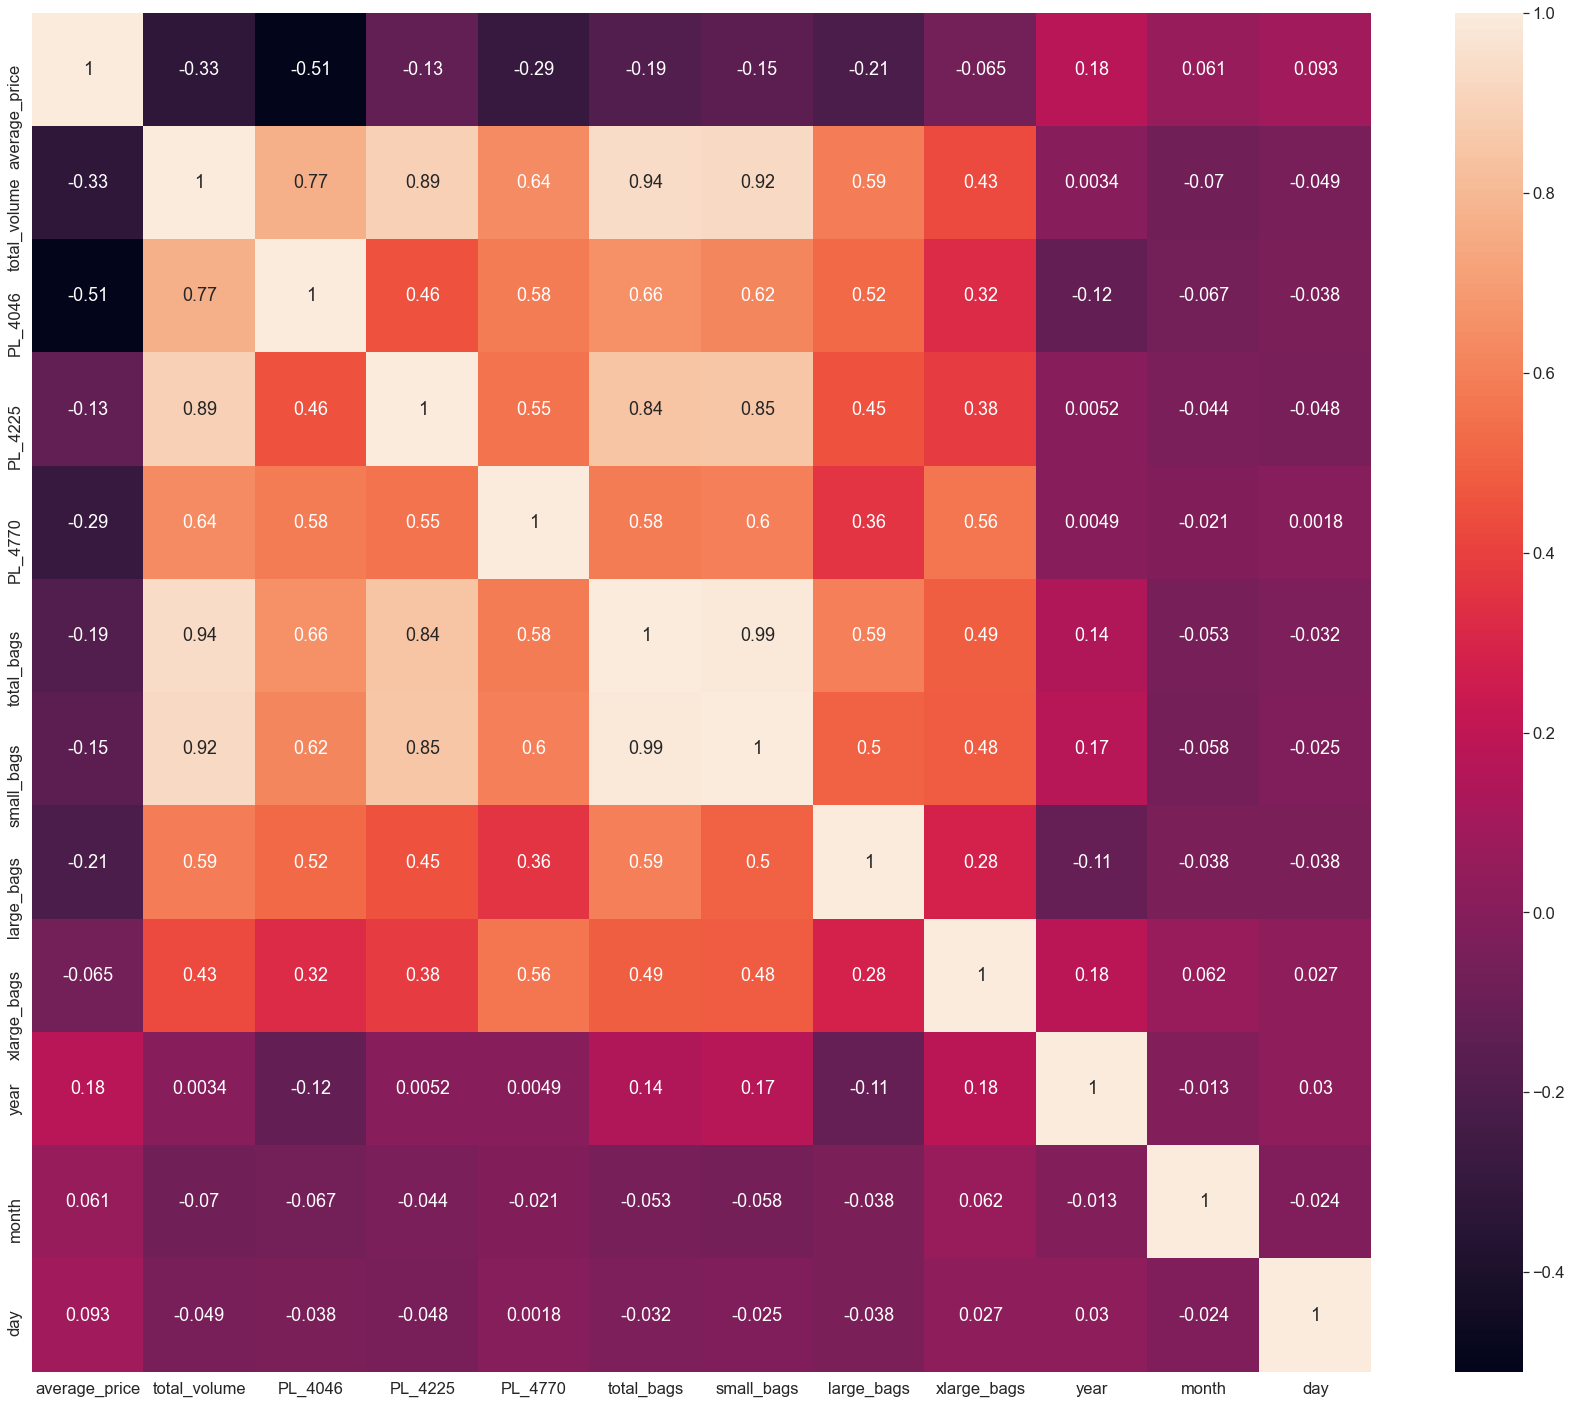

In [35]:
# Let's check the coorealtion
data_corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(data_corr,annot=True)
plt.plot()

In [36]:
# Seperating the target and input variables
X=data_final.iloc[:,1:14]
y=data_final['average_price']

In [37]:
# Scaling the imput variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)

# Machine Learning

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11314375803111733
MSE: 0.021719889288179604
RMSE: 0.14737669180769258


# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

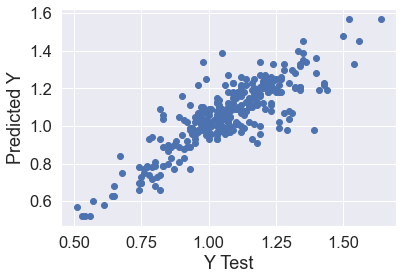

In [42]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Here we can see that it is a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07197368421052631
MSE: 0.010076973684210525
RMSE: 0.10038413063931233


#### RMSE is lower than the previous one we got with Linear Regression

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.060124671052631584
MSE: 0.006691902730263164
RMSE: 0.08180405081817871


## Conclusions 

 ##### Finally from above three algorithms used we can say that best alogrithm is Decision Tree. Lower the RMSE the better the accuracy

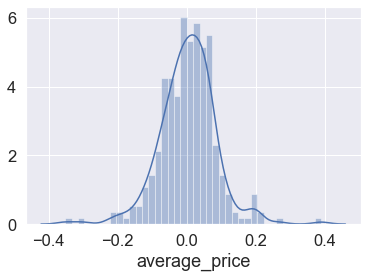

In [46]:
sns.distplot((y_test-pred),bins=40)

#### Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data

,Y Test,Pred
724,1.18,1.1095
812,1.25,1.1889
1466,1.08,1.0976
1469,1.07,1.1548
51,1.22,1.2574


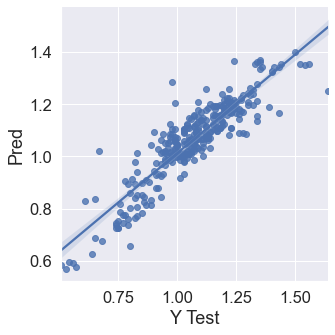

In [47]:
# Actual vs predicted Sample
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [48]:
import joblib

# Save the model in pickle file 
joblib.dump(dtr,'avocado.pkl')

['avocado.pkl']